# Graduate Admissions

This dataset is created for prediction of Graduate Admissions. 
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university. https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict.csv

# Content


The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

# Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

# Get the data

In [41]:
data=pd.read_csv('Admission_Predict.csv')

In [42]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})
data=data.rename(columns = {'LOR ':'LOR'})

In [43]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [45]:
data.isnull().sum() #non-null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [46]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Exploratory Data Analysis

In [47]:
cols=data.drop('Serial No.',axis=1)
cols.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [48]:
sns.set_style('whitegrid')

In [49]:
#Lets look at the distributions of GRE and TOEFL scores

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


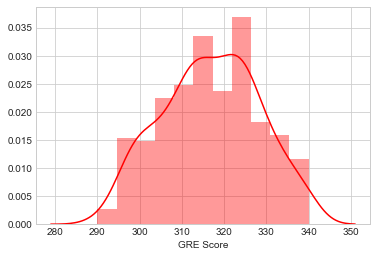

In [50]:
sns.distplot(cols['GRE Score'],color='red')

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


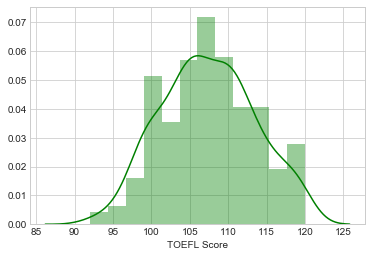

In [51]:
sns.distplot(cols['TOEFL Score'],color='green')

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


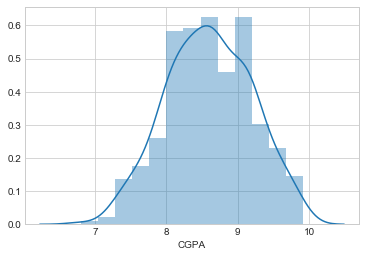

In [52]:
sns.distplot(cols['CGPA'])

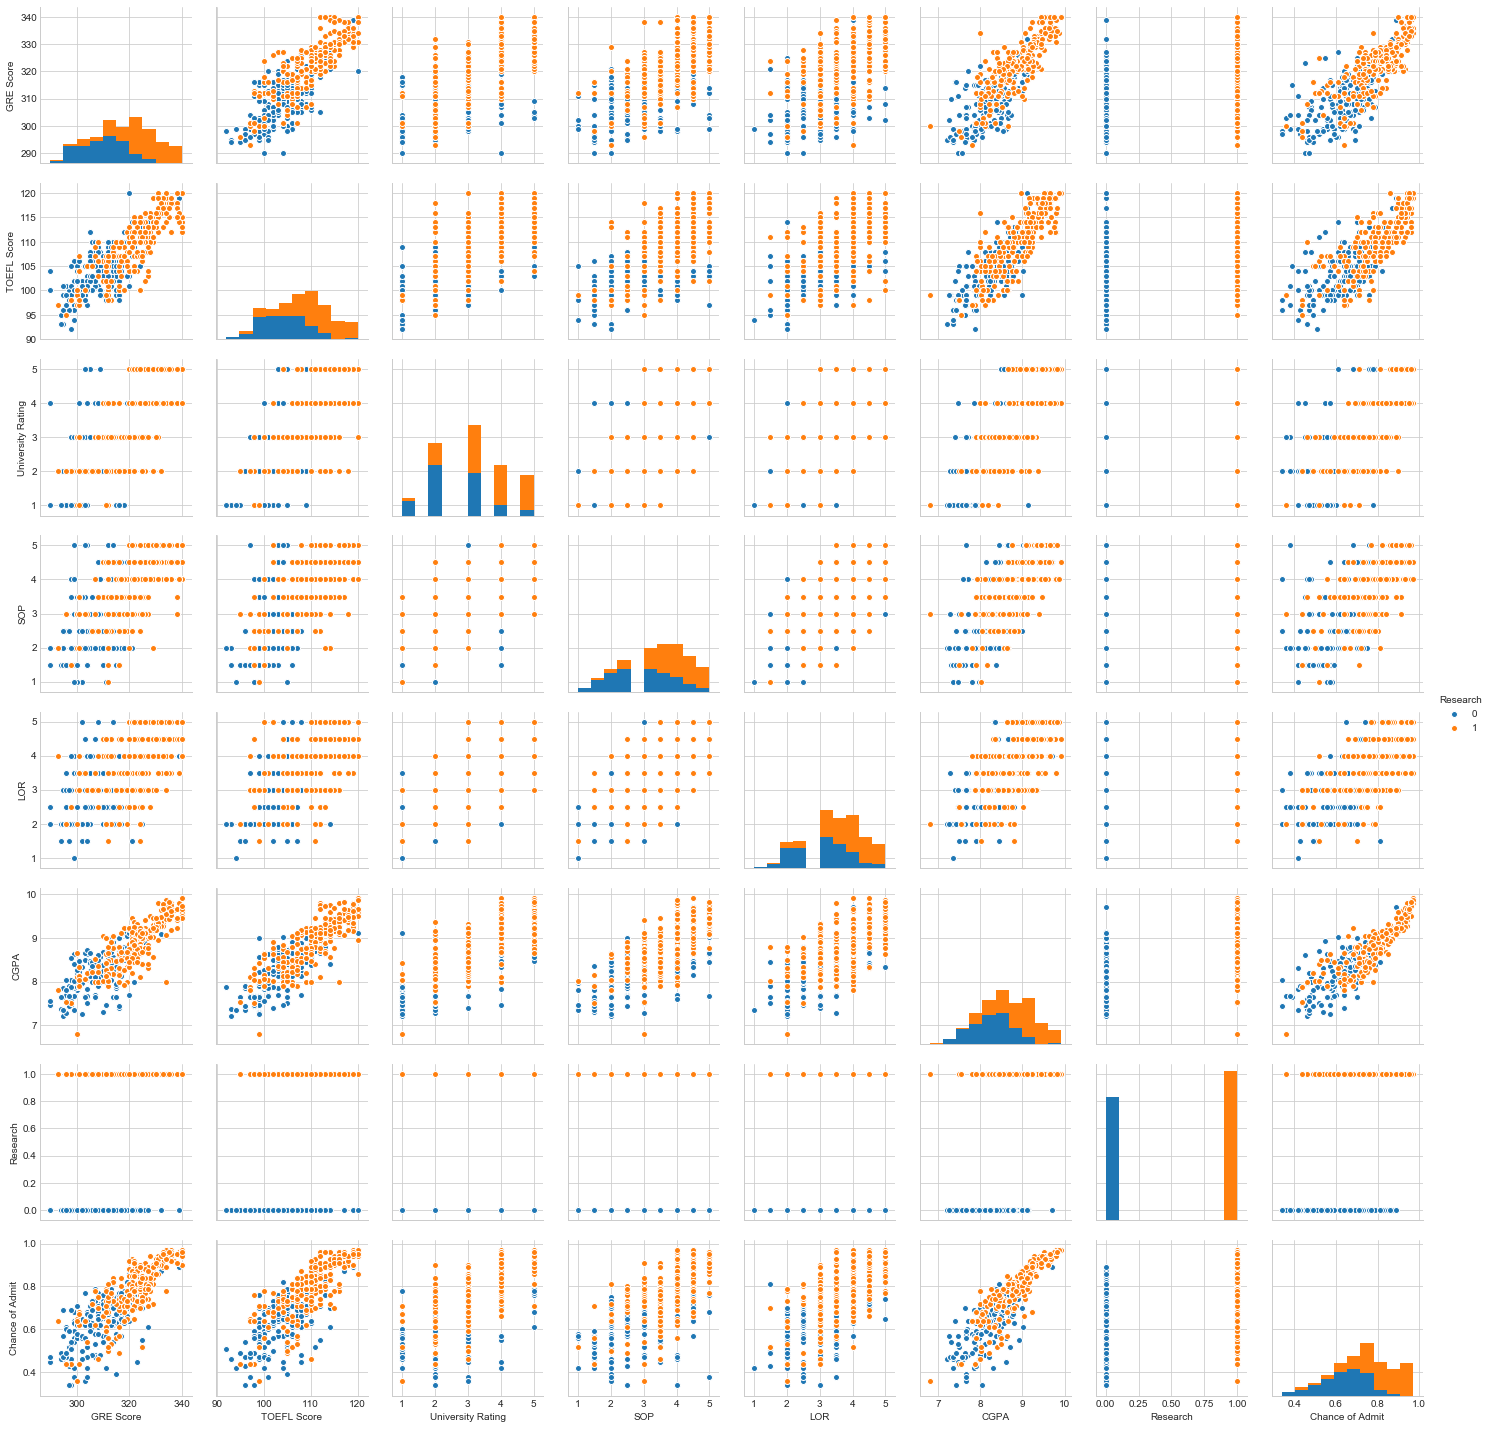

In [53]:
sns.pairplot(data=cols,hue='Research')

In [54]:
#Student with 'Research' scores more. 

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


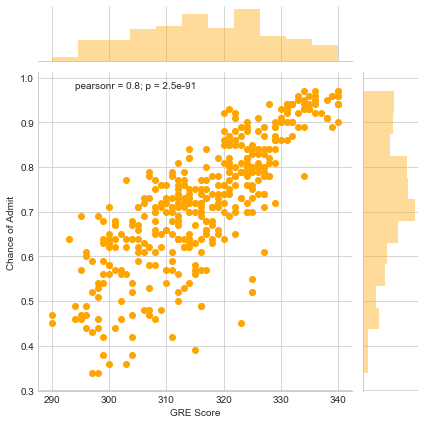

In [55]:
sns.jointplot(x='GRE Score',y='Chance of Admit',data=cols,color='orange')

In [56]:
#There is a positive correlation between Chance of Admit and GRE Score

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


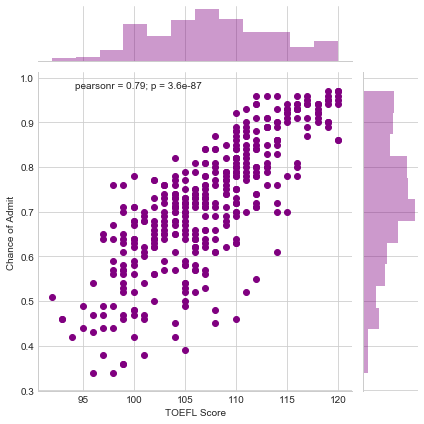

In [57]:
sns.jointplot(x='TOEFL Score',y='Chance of Admit',data=cols,color='purple')

In [58]:
#Positive correlation between TOEFL Score and Chance of Admit. Higher the TOEFL Score, higher Chance of Admit

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


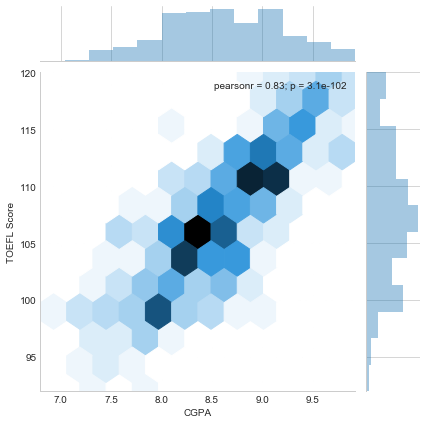

In [59]:
 sns.jointplot(x='CGPA',y='TOEFL Score',data=cols,kind='hexabin')

In [60]:
#There is a strong positive correlation between TOEFL score and CGPA. 

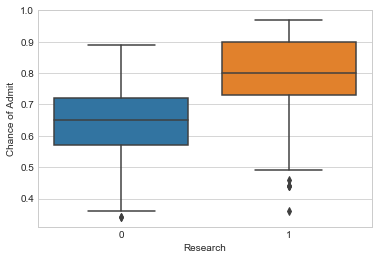

In [61]:
sns.boxplot(x='Research',y='Chance of Admit',data=cols)

In [62]:
#There is a more Chance of Admit if you have 'Research'. 

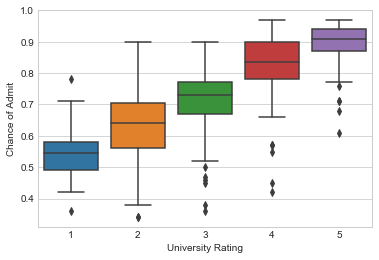

In [63]:
sns.boxplot(x='University Rating',y='Chance of Admit',data=cols)

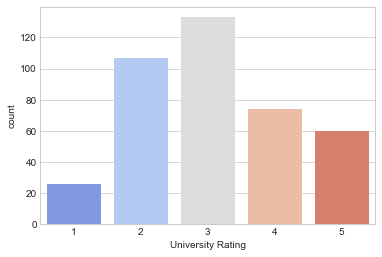

In [64]:
sns.countplot(x='University Rating',data=cols,palette='coolwarm')

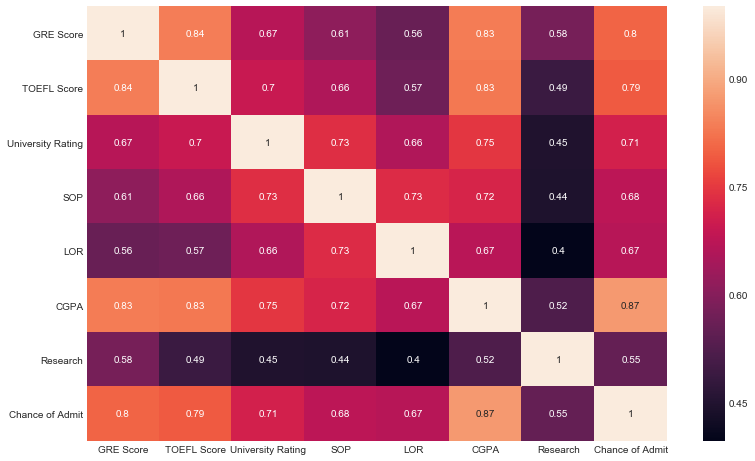

In [65]:
plt.figure(figsize=(13,8))
sns.heatmap(cols.corr(),annot=True)

In [66]:
#CGPA, TOEFL Score and GRE Score are highly correlated with Chance of Admit. Research,SOP and LOR are less correlated with Chance of Admit

# Standardize the Variables

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()

In [69]:
scaler.fit(cols.drop('Chance of Admit',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
scaled_features=scaler.transform(cols.drop('Chance of Admit',axis=1))

In [71]:
df=pd.DataFrame(scaled_features,columns=cols.columns[:-1])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [72]:
# we normalized 'cols' data and saved it as 'df'.

# Training and Testing 

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X=df
y=cols['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [75]:
from sklearn import metrics

In [76]:
#which regression model should we use?

# Comparison of regression models 

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [111]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Ridge Regression:', Ridge()],
       ['Lasso Regression :', Lasso()],
       ['ElasticNet Regression:' ,ElasticNet()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
reg_pred=[]

for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)

Linear Regression : 0.06929436991067942
Ridge Regression: 0.0693294822941243
Lasso Regression : 0.14318936964115495
ElasticNet Regression: 0.14318936964115495
Decision Tree Regression : 0.10601886624558857
Random Forest Regression : 0.0798132194564284
Gradient Boosting Regression : 0.07565095842518425
Ada Boosting Regression : 0.07290467139089424
Extra Tree Regression : 0.07566538178057387
K-Neighbors Regression : 0.07669419795525605
Support Vector Regression : 0.07504831141232675


# when we compare regression models, linear regression is the winner with lowest mean_squared_error. 

In [94]:
lm=LinearRegression()

In [95]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
predict=lm.predict(X_test)

In [97]:
print(lm.coef_)

[ 0.02740718  0.01769369  0.01298759 -0.00071419  0.01671146  0.06518502
  0.00449725]


In [98]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
GRE Score,0.027407
TOEFL Score,0.017694
University Rating,0.012988
SOP,-0.000714
LOR,0.016711
CGPA,0.065185
Research,0.004497


Create a scatterplot of the real test values versus the predicted values.

Text(0,0.5,'Predicted Y')

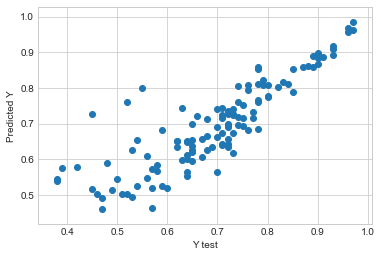

In [99]:
plt.scatter(y_test,predict)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [ ]:
#Lets check the residuals

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


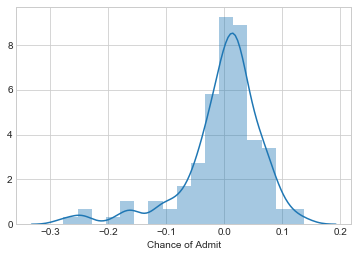

In [100]:
sns.distplot(y_test-predict)